[(4, 16), (13, 19), (18, 8), (22, 17)]


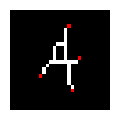

In [ ]:
import matplotlib.pyplot as plt
from skimage import io, color, transform
from skimage.filters import threshold_otsu
from skimage.morphology import skeletonize
import numpy as np
import cv2


image_path = '/content/A-0.png'
image = io.imread(image_path)

if image.ndim == 3:
    image = color.rgb2gray(image)

threshold_value = threshold_otsu(image)
binary_image = image > threshold_value

skeleton = skeletonize(binary_image)

image = transform.resize(image, (28, 28))
skeleton = transform.resize(skeleton, (28, 28))

plt.figure(figsize=(1, 1))

plt.imshow(skeleton, cmap=plt.cm.gray)
plt.axis('off')
plt.subplots_adjust(left=0, right=1, top=1, bottom=0)
plt.savefig('skeleton_image.png', format='png', dpi=28)


path = 'skeleton_image.png'
img = cv2.imread(path, 0)

(rows, cols) = np.nonzero(img)

endpoint_coords = []

for (r, c) in zip(rows, cols):
    top = max(0, r - 1)
    right = min(img.shape[1] - 1, c + 1)
    bottom = min(img.shape[0] - 1, r + 1)
    left = max(0, c - 1)

    sub_img = img[top: bottom + 1, left: right + 1]
    if np.sum(sub_img) == 255*2:
        endpoint_coords.append((r,c))

print(endpoint_coords)


skeleton_image = cv2.imread('skeleton_image.png', cv2.IMREAD_GRAYSCALE)
output_image = cv2.cvtColor(skeleton_image, cv2.COLOR_GRAY2BGR)
for point in endpoint_coords:
    y, x = point
    output_image[y, x] = (0, 0, 255)

plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

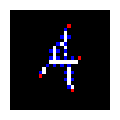

Endpoint Coordinates: [(4, 16), (13, 19), (18, 8), (22, 17)]
Keypoint Coordinates: [(5, 15), (7, 14), (7, 16), (9, 13), (9, 15), (11, 11), (11, 13), (11, 15), (13, 11), (13, 13), (13, 15), (13, 17), (15, 10), (15, 12), (15, 14), (15, 16), (17, 8), (17, 15), (17, 17), (19, 15), (19, 17), (21, 16)]


In [ ]:
import matplotlib.pyplot as plt
from skimage import io, color, transform
from skimage.filters import threshold_otsu
from skimage.morphology import skeletonize
import numpy as np
import cv2

def is_neighbor(point, other_points, distance=1):
    for other_point in other_points:
        if abs(point[0] - other_point[0]) <= distance and abs(point[1] - other_point[1]) <= distance:
            return True
    return False

def find_keypoints(img, endpoints):
    keypoint_coords = []
    for r in range(1, img.shape[0] - 1):
        for c in range(1, img.shape[1] - 1):
            if (r, c) not in endpoints and not is_neighbor((r, c), keypoint_coords):
                sub_img = img[r-1:r+2, c-1:c+2]
                white_pixel_count = np.sum(sub_img == 255)
                if white_pixel_count >= 3:
                    keypoint_coords.append((r, c))
    return keypoint_coords

image_path = 'A-0.png'
image = io.imread(image_path)

if image.ndim == 3:
    image = color.rgb2gray(image)

threshold_value = threshold_otsu(image)
binary_image = image > threshold_value

skeleton = skeletonize(binary_image)

image = transform.resize(image, (28, 28))
skeleton = transform.resize(skeleton, (28, 28))

plt.figure(figsize=(1, 1))

plt.imshow(skeleton, cmap=plt.cm.gray)
plt.axis('off')
plt.subplots_adjust(left=0, right=1, top=1, bottom=0)
plt.savefig('skeleton_image.png', format='png', dpi=28)

path = 'skeleton_image.png'
img = cv2.imread(path, 0)

(rows, cols) = np.nonzero(img)
endpoint_coords = []

for (r, c) in zip(rows, cols):
    top = max(0, r - 1)
    right = min(img.shape[1] - 1, c + 1)
    bottom = min(img.shape[0] - 1, r + 1)
    left = max(0, c - 1)
    sub_img = img[top: bottom + 1, left: right + 1]
    if np.sum(sub_img) == 255 * 2:
        endpoint_coords.append((r, c))

keypoint_coords = find_keypoints(img, endpoint_coords)

skeleton_image = cv2.imread('skeleton_image.png', cv2.IMREAD_GRAYSCALE)
output_image = cv2.cvtColor(skeleton_image, cv2.COLOR_GRAY2BGR)

for point in endpoint_coords:
    y, x = point
    output_image[y, x] = (0, 0, 255)

for point in keypoint_coords:
    y, x = point
    output_image[y, x] = (255, 0, 0)

plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

print("Endpoint Coordinates:", endpoint_coords)
print("Keypoint Coordinates:", keypoint_coords)


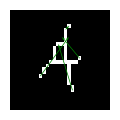

Endpoint Coordinates: [(4, 16), (13, 19), (18, 8), (22, 17)]
Keypoint Coordinates: [(5, 15), (7, 14), (7, 16), (9, 13), (9, 15), (11, 11), (11, 13), (11, 15), (13, 11), (13, 13), (13, 15), (13, 17), (15, 10), (15, 12), (15, 14), (15, 16), (17, 8), (17, 15), (17, 17), (19, 15), (19, 17), (21, 16)]


In [ ]:
import matplotlib.pyplot as plt
from skimage import io, color, transform
from skimage.filters import threshold_otsu
from skimage.morphology import skeletonize
import numpy as np
import cv2

def is_neighbor(point, other_points, distance=1):
    for other_point in other_points:
        if abs(point[0] - other_point[0]) <= distance and abs(point[1] - other_point[1]) <= distance:
            return True
    return False

def find_keypoints(img, endpoints):
    keypoint_coords = []
    for r in range(1, img.shape[0] - 1):
        for c in range(1, img.shape[1] - 1):
            if (r, c) not in endpoints and not is_neighbor((r, c), keypoint_coords):
                sub_img = img[r-1:r+2, c-1:c+2]
                white_pixel_count = np.sum(sub_img == 255)
                if white_pixel_count >= 3:
                    keypoint_coords.append((r, c))
    return keypoint_coords

def display_vectors(endpoint_coords, keypoint_coords):
    plt.figure(figsize=(1, 1))

    plt.imshow(skeleton, cmap=plt.cm.gray)
    plt.axis('off')
    plt.subplots_adjust(left=0, right=1, top=1, bottom=0)

    for endpoint, keypoint in zip(endpoint_coords, keypoint_coords):
        ey, ex = endpoint
        ky, kx = keypoint
        plt.quiver(ex, ey, kx - ex, ky - ey, angles='xy', scale_units='xy', scale=1, color='green')

    plt.show()

image_path = 'A-0.png'
image = io.imread(image_path)

if image.ndim == 3:
    image = color.rgb2gray(image)

threshold_value = threshold_otsu(image)
binary_image = image > threshold_value

skeleton = skeletonize(binary_image)

image = transform.resize(image, (28, 28))
skeleton = transform.resize(skeleton, (28, 28))

path = 'skeleton_image.png'
img = cv2.imread(path, 0)

(rows, cols) = np.nonzero(img)
endpoint_coords = []
keypoint_coords = []

for (r, c) in zip(rows, cols):
    if img[r, c] == 255:
        top = max(0, r - 1)
        right = min(img.shape[1] - 1, c + 1)
        bottom = min(img.shape[0] - 1, r + 1)
        left = max(0, c - 1)
        sub_img = img[top: bottom + 1, left: right + 1]
        if np.sum(sub_img) == 255 * 2:
            endpoint_coords.append((r, c))

keypoint_coords = find_keypoints(img, endpoint_coords)

display_vectors(endpoint_coords, keypoint_coords)

print("Endpoint Coordinates:", endpoint_coords)
print("Keypoint Coordinates:", keypoint_coords)


In [ ]:
pip install svgwrite

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 kB 1.9 MB/s eta 0:00:00


In [ ]:
from svgwrite import Drawing

In [ ]:
svg_width = 500  # Specify the width of the SVG canvas
svg_height = 500  # Specify the height of the SVG canvas

dwg = Drawing("output.svg", (svg_width, svg_height))


In [ ]:
vectors = [(100, 100), (200, 100), (200, 200), (100, 200)]  # Example list of vectors

path_data = "M{0} {1} ".format(vectors[0][0], vectors[0][1])  # Move to the first point

for vector in vectors[1:]:
    path_data += "L{0} {1} ".format(vector[0], vector[1])  # Line to the next point

path_data += "Z"  # Close the path (optional, to create a closed shape)

# Create the SVG path element and set its attributes
dwg.add(dwg.path(d=path_data, fill="none", stroke="black"))


In [ ]:
print(path_data)

M100 100 L200 100 L200 200 L100 200 Z
